#### Introduction:
Phishing is one of the most widespread and dangerious forms of cybercrime, where attackers deceive users into revealing personal information such as usernames, passwords, or financial details by masquerading as trustworthy entities. These attacks typically involve the use of fraudulent websites that mimic legitimate ones, and they continue to evolve in sophistication, making them harder to detect using traditional security filters.
The goal of this project is to explore and analyze a phishing website dataset using statistical techniques and visual analysis. The dataset contains multiple features such as URL length, use of HTTPS, number of redirects, domain age, and whether the website uses popup windows or IP addresses. By understanding how these features differ between phishing and legitimate sites, we can uncover patterns that help in detecting phishing behavior.
The project begins with data wrangling and cleaning to ensure data integrity. It then proceeds with descriptive statistics and visualizations to identify key trends. Using SciPy, we perform deeper statistical analysis such as t-tests, z-score outlier detection, chi-square independence testing, correlation analysis (Pearson and Spearman), and normality testing. These techniques allow us to quantify the significance of relationships and support data-driven decisions.

Business Use Cases:
Email Security Filters
Phishing URL detection models can be integrated into email gateways to filter suspicious links before they reach users.
Browser and Extension Security
Real-time warning systems can be developed for browsers using models trained on features derived from this data.
Enterprise Security Monitoring
Cybersecurity teams can integrate phishing detection pipelines into SIEM (Security Information and Event Management) systems.
Financial Services and Banking
Banks can proactively flag suspicious sites impersonating their domains to protect customer credentials.
Threat Intelligence Platforms
Intelligence feeds can be enriched with pattern-based classification of URLs to detect new phishing campaigns early.
Awareness and Training Tools
Simulated phishing environments can be built using data insights to educate employees on phishing tactics.
Government and Public Sector
National cybersecurity initiatives can use these insights for public reporting systems and proactive protection strategies.

This project offers a practical and educational approach to understanding phishing detection using a combination of statistics, visualization, and real-world cybersecurity concerns. It serves as a bridge between foundational data science techniques and applied cybersecurity solutions.


### 🔬 SciPy Lab: Phishing Website Detection Project


🎯 Objective:
Use SciPy to perform statistical analysis on a phishing dataset and draw insights using real-world cybersecurity questions.
Dataset: phishing_lab_dataset.csv


### 🧪 Use Case 1: Summary Statistics (Mean, Median, Mode)
Q: Are phishing URLs typically longer than legitimate ones?
Explanation:
Mean gives the average URL length.
Median shows the middle value (helps handle skewed data).
Mode finds the most frequent URL length.
Use all three to understand the central tendency of URL lengths.


### a. Load the csv file and find null values

In [2]:
import pandas as pd

# loading a DataFrame
df = pd.read_csv('Dataset.csv')
# Give the information on datasets

print("Missing values per column:\n", df.isnull().sum())

Missing values per column:
 url_length            0
has_ip_address        0
https                 0
domain_age          250
has_at_symbol         0
redirects             0
prefix-suffix         0
sfh                 150
subdomains_count      0
popup_window          0
label                 0
dtype: int64


### b. Data Cleaning:
- in missing shf place mode(most frequent value)
- in domain age mean

In [3]:
# Calculate mode for 'sfh' and mean (rounded) for 'domain_age'
sfh_mode = df['sfh'].mode()[0]
domain_age_mean = round(df['domain_age'].mean(), 1)

# Fill missing values
df['sfh'] = df['sfh'].fillna(sfh_mode)
df['domain_age'] = df['domain_age'].fillna(domain_age_mean)

# Confirm no missing values
print(df.isnull().sum())

url_length          0
has_ip_address      0
https               0
domain_age          0
has_at_symbol       0
redirects           0
prefix-suffix       0
sfh                 0
subdomains_count    0
popup_window        0
label               0
dtype: int64


### c:
- url_length put median value  in place of Long 
- in https place the mode


In [4]:
# Fix url_length: replace 'long' with median
df['url_length'] = pd.to_numeric(df['url_length'], errors='coerce')  # turns 'long' into NaN
df['url_length'].fillna(df['url_length'].median(), inplace=True)

# Fix https: replace anything not 0 or 1 with the most common (mode)
df['https'] = df['https'].apply(lambda x: x if x in [0, 1] else df['https'].mode()[0])



C:\Users\A C E R\AppData\Local\Temp\ipykernel_17908\349681544.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['url_length'].fillna(df['url_length'].median(), inplace=True)


In [5]:
# Save cleaned file
df.to_csv("cleaned_file.csv", index=False)

print("Cleaned data saved as cleaned_file.csv")

Cleaned data saved as cleaned_file.csv


In [6]:
from scipy import stats

mean = df['url_length'].mean()
median = df['url_length'].median()
mode = stats.mode(df['url_length'], keepdims=True)
print(f'Mean: {mean} \nMedian: {median} \nMode: {mode[0]}')

Mean: 79.8926 
Median: 80.0 
Mode: [80.]


### 🧪 Use Case 2: Z-Test (Outlier Detection):
Q: Are there any unusually long URLs that might be suspicious?
Explanation:
Z-score > 3 or < -3 indicates outliers.
Helps spot extreme phishing attempts with oddly long URLs.



In [7]:
import pandas as pd
from scipy.stats import zscore

# Step 1: Calculate Z-scores for 'url_length'
df['url_zscore'] = zscore(df['url_length'])

# Step 2: Identify outliers (Z-score > 3 or < -3)
outliers = df[df['url_zscore'].abs() > 3]

# Print number of outliers and preview
print(f"Total outliers found: {len(outliers)}")
print(outliers[['url_length', 'url_zscore']])


Total outliers found: 0
Empty DataFrame
Columns: [url_length, url_zscore]
Index: []


### Use Case 3: T-Test (Comparing Two Groups)
Q: Is there a significant difference in URL length between phishing and legitimate sites?

Explanation:
Null Hypothesis: The means are the same.
If p < 0.05, the difference is statistically significant.

In [8]:
from scipy.stats import ttest_ind

# Separate url_length based on label
phishing = df[df['label'] == 1]['url_length']
legit = df[df['label'] == 0]['url_length']

# Perform t-test
stat, p = ttest_ind(phishing, legit)

# Print the result
print(f"T-statistic: {stat:.3f}")
print(f"P-value: {p:.4f}")

# Interpretation
if p < 0.05:
    print("✅ The difference in URL length between phishing and legit websites is statistically significant.")
else:
    print("❌ No significant difference in URL length between phishing and legit websites.")


T-statistic: 11.380
P-value: 0.0000
✅ The difference in URL length between phishing and legit websites is statistically significant.


### 🧪 Use Case 4: Chi-Square Test (Categorical Association)
Q: Is there a relationship between using HTTPS and phishing sites?

Explanation:
Tests if two categorical variables are independent.
If p < 0.05, HTTPS usage and phishing are not independent — they may be related.

In [9]:
from scipy.stats import chi2_contingency
import pandas as pd

# Create a contingency table
contingency = pd.crosstab(df['https'], df['label'])

# Run the chi-square test
chi2, p, dof, expected = chi2_contingency(contingency)

# Show results
print("Chi-square statistic:", round(chi2, 3))
print("Degrees of freedom:", dof)
print("P-value:", round(p, 4))

# Interpretation
if p < 0.05:
    print("✅ There is a significant relationship between HTTPS usage and phishing/legit classification.")
else:
    print("❌ No significant relationship between HTTPS usage and phishing/legit classification.")


Chi-square statistic: 220.926
Degrees of freedom: 1
P-value: 0.0
✅ There is a significant relationship between HTTPS usage and phishing/legit classification.


### 🧪 Use Case 5: Correlation (Pearson and Spearman)
Q: Do older domains tend to be more trustworthy (less phishing)?

Explanation:
Pearson: Measures linear relationship.
Spearman: Measures monotonic (ranked) relationship.
If correlations are negative, older domains may be less likely to be phishing.


In [10]:
from scipy.stats import pearsonr, spearmanr

# Pearson: Measures linear correlation
pearson_corr, p1 = pearsonr(df['domain_age'], df['label'])

# Spearman: Measures monotonic relationship (doesn't require linearity)
spearman_corr, p2 = spearmanr(df['domain_age'], df['label'])

# Print results
print("📊 Pearson correlation (linear):", round(pearson_corr, 3))
print("P-value (Pearson):", round(p1, 4))

print("📈 Spearman correlation (monotonic):", round(spearman_corr, 3))
print("P-value (Spearman):", round(p2, 4))

# Interpret results
if p1 < 0.05:
    print("✅ Pearson: Significant linear relationship with domain_age.")
else:
    print("❌ Pearson: No significant linear relationship.")

if p2 < 0.05:
    print("✅ Spearman: Significant monotonic relationship with domain_age.")
else:
    print("❌ Spearman: No significant monotonic relationship.")


📊 Pearson correlation (linear): -0.022
P-value (Pearson): 0.123
📈 Spearman correlation (monotonic): -0.021
P-value (Spearman): 0.1389
❌ Pearson: No significant linear relationship.
❌ Spearman: No significant monotonic relationship.


### 🧪 Use Case 6: Shapiro-Wilk Normality Test
Q: Is the URL length data normally distributed?

Important before running parametric tests (like t-test)


In [11]:
from scipy.stats import shapiro

stat, p = shapiro(df['url_length'])

print(f"Shapiro-Wilk test statistic: {stat:.4f}")
print(f"P-value: {p:.4f}")

if p > 0.05:
    print("Data is approximately normally distributed.")
else:
    print("Data is NOT normally distributed.")


Shapiro-Wilk test statistic: 0.9570
P-value: 0.0000
Data is NOT normally distributed.


### Data Visualization

### 1. Distribution of Phishing vs Legitimate Websites
#### Use Case: Understand class balance.
Description: Helps assess if the dataset is balanced or imbalanced.

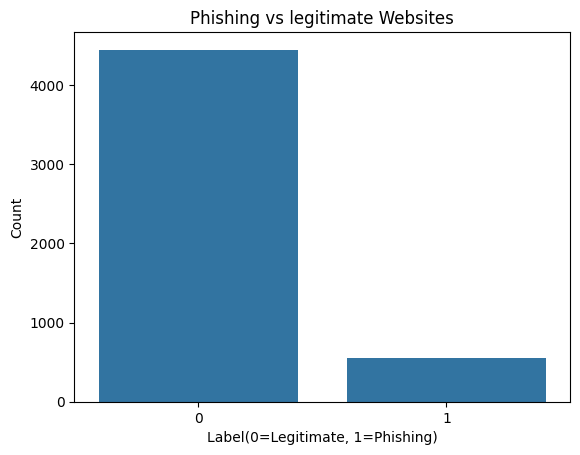

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(x='label', data=df)
plt.title("Phishing vs legitimate Websites")
plt.xlabel("Label(0=Legitimate, 1=Phishing)")
plt.ylabel("Count")
plt.show()

#### 2. Histogram of URL Length
##### Use Case: Explore distribution of URL lengths.
Description: Shows common lengths and potential outliers.


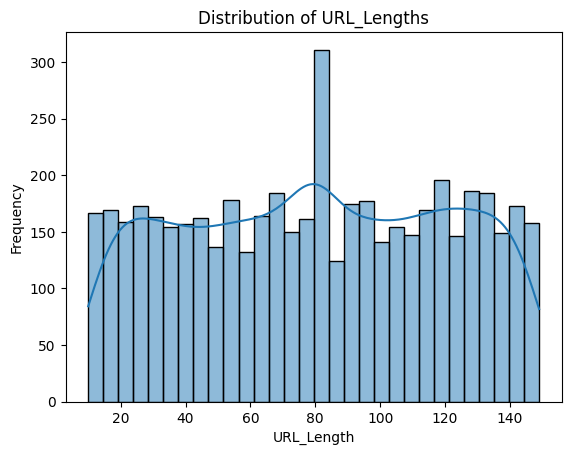

In [16]:
import seaborn as sns
import matplotlib.pyplot as plt

# Histogram with KDE (Kernel Density Estimate)
sns.histplot(df['url_length'], bins=30, kde=True)

# Title and axis labels
plt.title("Distribution of URL_Lengths")
plt.xlabel("URL_Length")
plt.ylabel("Frequency")

# Show the plot
plt.show()


#### 4. Bar Plot of HTTPS Usage vs Label
##### Use Case: Understand HTTPS impact on phishing probability.
Description: Highlights how use of HTTPS differs between phishing and legit sites.

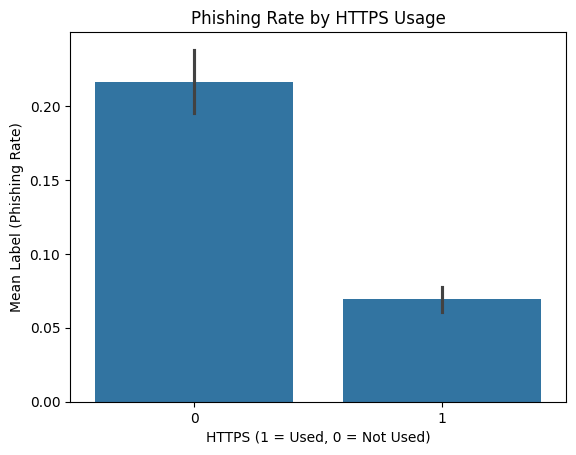

In [17]:
sns.barplot(x='https', y='label', data=df)
plt.title("Phishing Rate by HTTPS Usage")
plt.xlabel("HTTPS (1 = Used, 0 = Not Used)")
plt.ylabel("Mean Label (Phishing Rate)")
plt.show()


#### 5. Correlation Heatmap
##### Use Case: Identify relationships between numeric features.
Description: Helps in feature selection and understanding patterns.

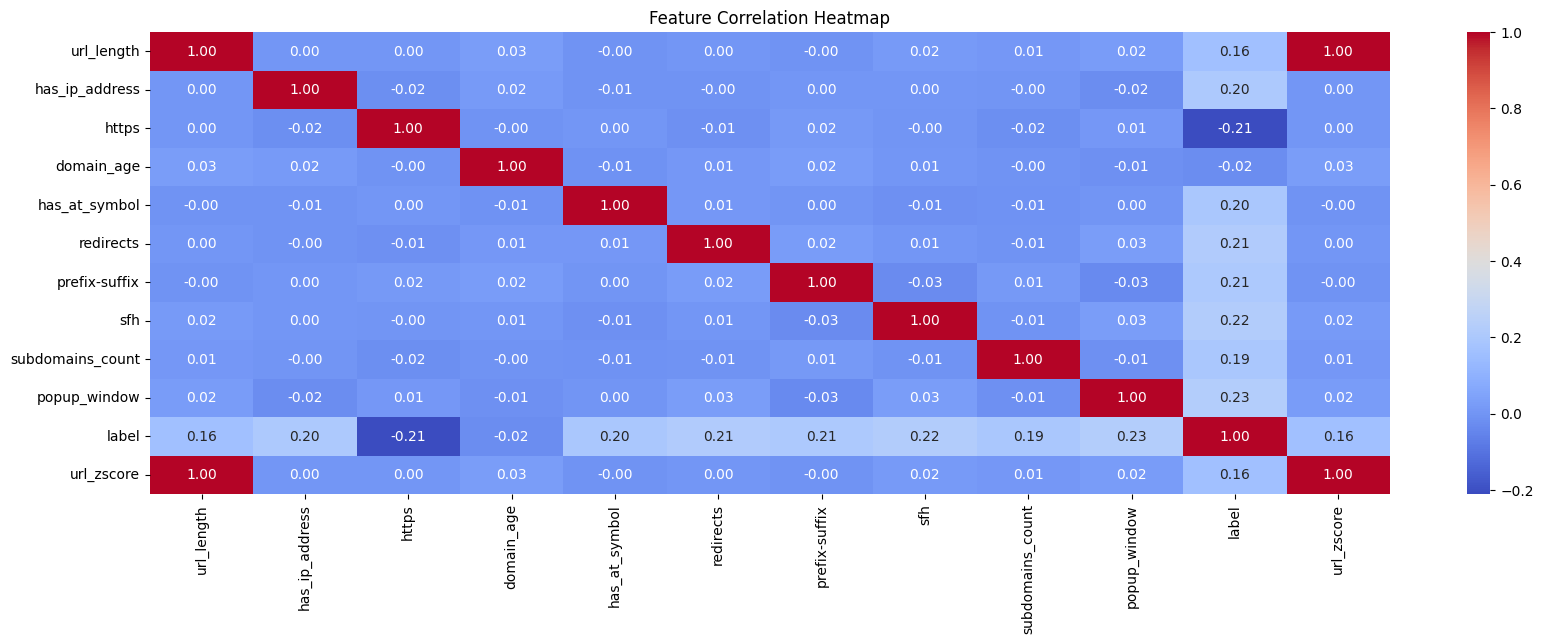

In [19]:
plt.figure(figsize=(20, 6))

# Heatmap of correlation matrix
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt='.2f')

# Title and display
plt.title("Feature Correlation Heatmap")
plt.show()

#### 6. Pairplot for Selected Features
##### Use Case: Explore multi-feature relationships.
Description: Displays scatterplots between selected features with class coloring.

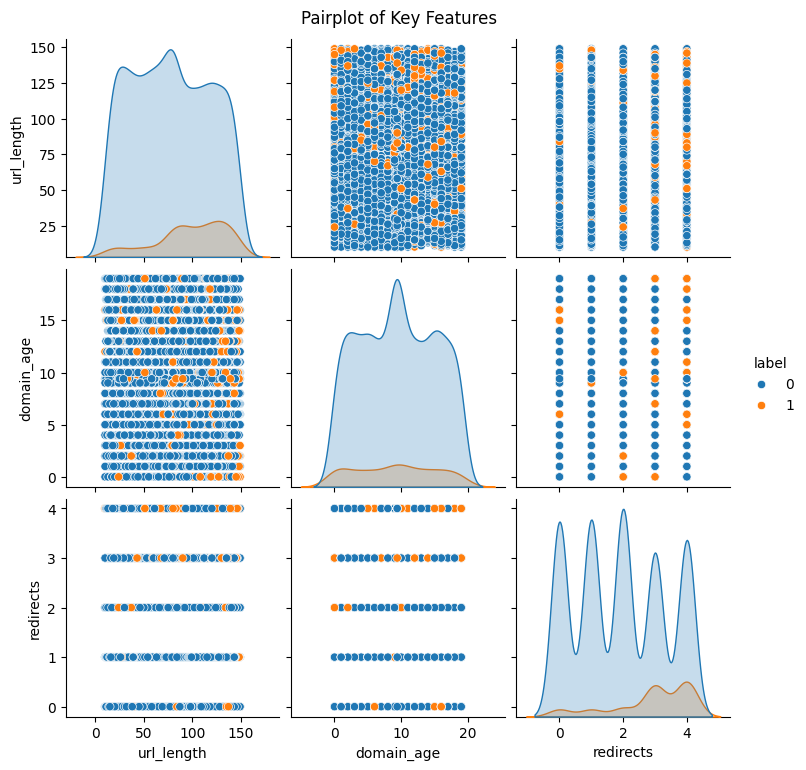

In [20]:
sns.pairplot(df[['url_length', 'domain_age', 'redirects', 'label']], hue='label')
plt.suptitle("Pairplot of Key Features", y=1.02)
plt.show()


#### 7. Pie Chart of HTTPS Usage
##### Use Case: Visual overview of HTTPS presence.
Description: Simple breakdown of HTTPS vs non-HTTPS sites.

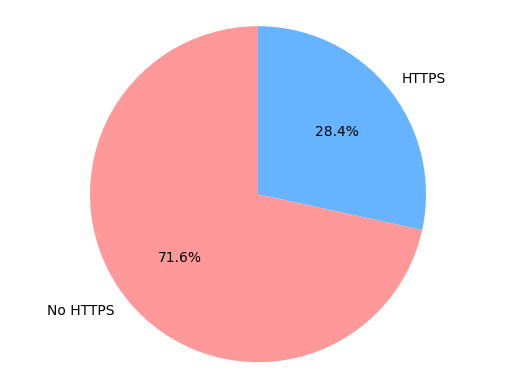

In [21]:
https_counts=df['https'].value_counts()
plt.pie(https_counts,labels=['No HTTPS','HTTPS'],autopct='%1.1f%%',startangle=90,colors=['#ff9999','#66b3ff'])
plt.axis('equal')
plt.show()

#### 8. Subdomain Count by Label (Bar Plot)
##### Use Case: Are phishing sites using more subdomains?
Description: Checks if subdomain count is related to phishing.

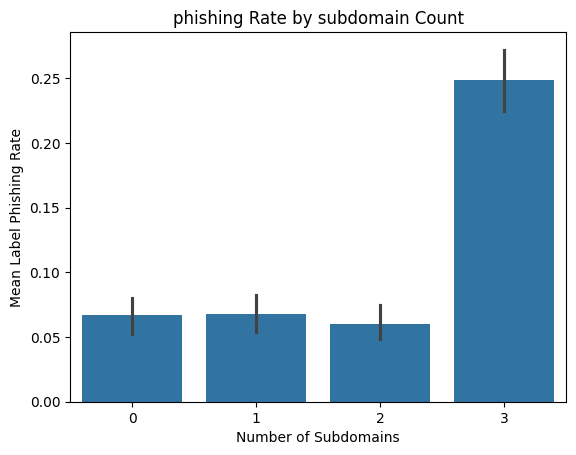

In [22]:
sns.barplot(x='subdomains_count',y='label',data=df)
plt.title('phishing Rate by subdomain Count')
plt.xlabel('Number of Subdomains')
plt.ylabel('Mean Label Phishing Rate')
plt.show()

#### 9. Popup Window Usage by Site Type
##### Use Case: Show use of pop-ups in phishing.
Description: Demonstrates whether pop-ups are more common in phishing sites.


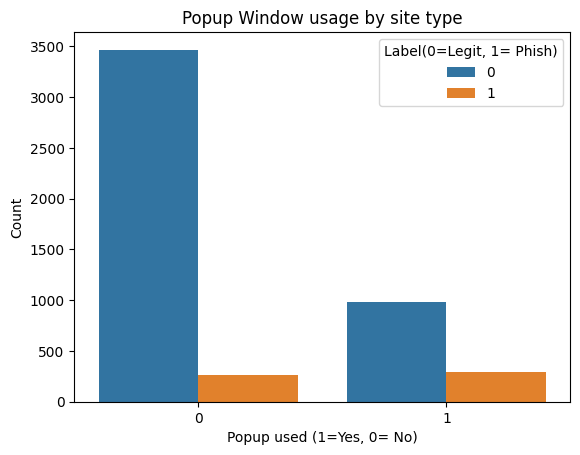

In [23]:
sns.countplot(x='popup_window',hue='label',data=df)
plt.title("Popup Window usage by site type")
plt.xlabel("Popup used (1=Yes, 0= No)")
plt.ylabel("Count")
plt.legend(title='Label(0=Legit, 1= Phish)')
plt.show()

#### 10. Domain Age Distribution by Label
##### Use Case: See how domain age affects phishing likelihood.
Description: Shows whether newer domains are more often phishing-related.

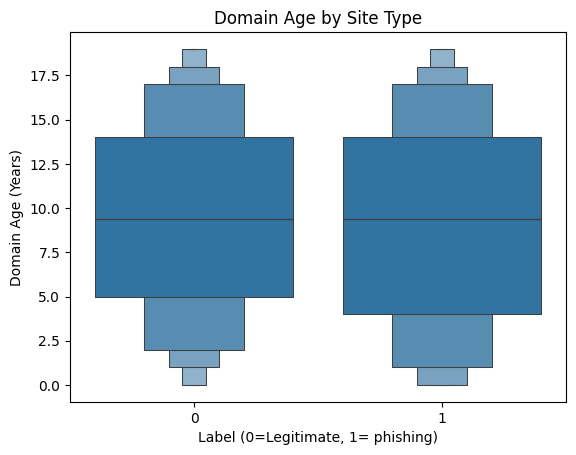

In [24]:
sns.boxenplot(x='label',y='domain_age',data=df)
plt.title("Domain Age by Site Type")
plt.xlabel("Label (0=Legitimate, 1= phishing)")
plt.ylabel('Domain Age (Years)')
plt.show()